In [1]:
# ==============================================================================
# FlowCast Project: 01_data_exploration.ipynb
# 
# เป้าหมาย: ทดลองดึงข้อมูลจาก API กรมชลประทาน (ข้อมูลน้ำในเขื่อน)
# และแปลงให้อยู่ในรูปแบบตาราง (DataFrame) เพื่อสำรวจเบื้องต้น
# ==============================================================================

# 1. Import library ที่จำเป็น
# requests ใช้สำหรับยิง HTTP request ไปยัง API Server
# pandas เป็นเครื่องมือหลักของเราในการจัดการข้อมูลในรูปแบบตาราง
import requests
import pandas as pd

# ตั้งค่าให้ pandas แสดงผลคอลัมน์ทั้งหมด จะได้เห็นข้อมูลครบถ้วน
pd.set_option('display.max_columns', None)

print("Libraries imported successfully!")

# 2. กำหนด URL ของ API ที่เราต้องการดึงข้อมูล
# นี่คือ API สำหรับข้อมูลอ่างเก็บน้ำ/เขื่อนขนาดใหญ่ของกรมชลประทาน
api_url = "https://app.rid.go.th/reservoir/api/dam/public"

print(f"Attempting to fetch data from: {api_url}")

# 3. ส่งคำขอ (GET request) ไปยัง API และตรวจสอบสถานะ
try:
    response = requests.get(api_url)
    
    # ตรวจสอบว่าการเชื่อมต่อสำเร็จหรือไม่ (Status code 200 คือสำเร็จ)
    response.raise_for_status() 
    
    print(f"✅ Connection successful! (Status code: {response.status_code})")
    
    # 4. แปลงข้อมูลที่ได้จาก JSON format ให้เป็น Python Dictionary
    raw_data = response.json()
    
    # ลองแสดงผลข้อมูลดิบเพื่อดูโครงสร้างคร่าวๆ
    # print("\nRaw JSON data structure:")
    # print(raw_data)

    # 5. แปลงข้อมูลให้อยู่ในรูปแบบตาราง (DataFrame)
    # จากการดูโครงสร้าง JSON เราพบว่าข้อมูลเขื่อนจริงๆ อยู่ใน list ที่ซ้อนกันอยู่ข้างใน
    # เราจึงต้องเจาะเข้าไปเพื่อดึงข้อมูลส่วนนั้นออกมา
    
    all_dams_list = []
    # วนลูปเข้าไปในแต่ละภาค (region)
    for region in raw_data['data']:
        # วนลูปเข้าไปในแต่ละเขื่อน (dam) ของภาคนั้นๆ
        for dam in region['dam']:
            # เพิ่มข้อมูล 'ภาค' เข้าไปในข้อมูลของแต่ละเขื่อน เพื่อให้รู้ว่าเขื่อนนี้อยู่ภาคไหน
            dam['region'] = region['region'] 
            all_dams_list.append(dam)

    # สร้าง DataFrame จาก list ของข้อมูลเขื่อนทั้งหมด
    df = pd.DataFrame(all_dams_list)

    print("\n🎉 Successfully converted JSON to DataFrame!")
    
    # 6. แสดงผลข้อมูลเบื้องต้นเพื่อสำรวจ
    print("\n--- First 5 rows of the data ---")
    display(df.head())
    
    print("\n--- Data types and non-null values ---")
    df.info()

except requests.exceptions.RequestException as e:
    print(f"❌ Failed to connect to the API: {e}")

Libraries imported successfully!
Attempting to fetch data from: https://app.rid.go.th/reservoir/api/dam/public
✅ Connection successful! (Status code: 200)

🎉 Successfully converted JSON to DataFrame!

--- First 5 rows of the data ---


,id,name,owner,capacity,storage,active_storage,dead_storage,volume,percent_storage,inflow,outflow,region
0,100104,เขื่อนแม่กวงอุดมธารา,กรมชลประทาน,295.00,263.00,249.00,14.00,186.34,70.85,1.22,0.36,ภาคเหนือ
1,100105,เขื่อนกิ่วลม,กรมชลประทาน,106.22,106.22,102.67,3.55,61.18,57.60,5.25,4.10,ภาคเหนือ
2,100106,เขื่อนกิ่วคอหมา,กรมชลประทาน,208.60,170.00,163.80,6.20,99.54,58.55,1.50,1.80,ภาคเหนือ
3,100107,เขื่อนแควน้อยบำรุงแดน,กรมชลประทาน,1080.00,939.00,896.00,43.00,652.25,69.46,36.80,1.30,ภาคเหนือ
4,100108,เขื่อนแม่มอก,กรมชลประทาน,110.00,110.00,94.10,15.90,112.80,102.55,1.48,2.60,ภาคเหนือ



--- Data types and non-null values ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               35 non-null     object 
 1   name             35 non-null     object 
 2   owner            35 non-null     object 
 3   capacity         35 non-null     float64
 4   storage          35 non-null     float64
 5   active_storage   35 non-null     float64
 6   dead_storage     35 non-null     float64
 7   volume           35 non-null     float64
 8   percent_storage  35 non-null     float64
 9   inflow           35 non-null     float64
 10  outflow          30 non-null     float64
 11  region           35 non-null     object 
dtypes: float64(8), object(4)
memory usage: 3.4+ KB


In [ ]:
import urllib
      url = 'https://data.thailand.opendevelopmentmekong.net/th/api/3/action/datastore_search?limit=5&resource_id=85b172c6-dc66-4088-a5c5-e01d9ff632c2&q=title:jones'  
      fileobj = urllib.urlopen(url)
      print fileobj.read()

IndentationError: unexpected indent (367928974.py, line 2)

In [19]:
# ==============================================================================
# FlowCast Project: 02_bkk_data_exploration.ipynb (Final - with Inspection)
#
# เป้าหมาย: โหลดข้อมูลขอบเขต 50 เขตของกรุงเทพมหานครให้สำเร็จ
# ==============================================================================

import geopandas as gpd
import matplotlib.pyplot as plt
import requests

print("Libraries imported successfully!")

# 1. กำหนด URL ที่ถูกต้องที่สุด และ Header
final_url = "https://cityplangis.bangkok.go.th/arcgis/rest/services/bma/ComprehensivePlan/MapServer/28/query?where=1%3D1&outFields=*&outSR=4326&f=json"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

print(f"Attempting to fetch data from: {final_url}")

try:
    # 2. ส่งคำขอเพื่อดึงข้อมูล
    response = requests.get(final_url, headers=headers)
    response.raise_for_status()
    data = response.json()
    print("✅ Successfully downloaded JSON data.")

    # 3. **ขั้นตอนสำคัญ: ตรวจสอบโครงสร้างของ JSON ที่ได้มา**
    print("\n--- Inspecting the structure of the received JSON ---")
    print(f"Top-level keys are: {data.keys()}")

    # 4. เข้าถึงข้อมูล features จาก key ที่ถูกต้อง
    #    ข้อมูล features ที่เราต้องการอยู่ข้างใน key ที่ชื่อ 'features'
    feature_data = data['features']
    print(f"Found {len(feature_data)} features in the data.")
    
    # 5. สร้าง GeoDataFrame จากข้อมูล features ที่ดึงออกมา
    gdf_bkk = gpd.GeoDataFrame.from_features(feature_data)
    print("\n🎉 Success! Data loaded into GeoDataFrame!")

    # 6. แสดงผลข้อมูลและแผนที่
    print("\n--- First 5 rows of the data ---")
    display(gdf_bkk.head())

    print("\n--- Plotting Bangkok Districts Map ---")
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    gdf_bkk.plot(ax=ax, edgecolor='black', facecolor='lightblue')
    
    ax.set_title("แผนที่ 50 เขตในกรุงเทพมหานคร", fontsize=16)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    plt.show()

except requests.exceptions.HTTPError as http_err:
    print(f"❌ HTTP Error occurred: {http_err}")
    print(f"Raw response content:\n{response.text[:500]}")
except KeyError as key_err:
    print(f"❌ KeyError: The key '{key_err}' was not found. Please check the JSON structure.")
    print("Here are the available keys:", data.keys())
except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")

Libraries imported successfully!
Attempting to fetch data from: https://cityplangis.bangkok.go.th/arcgis/rest/services/bma/ComprehensivePlan/MapServer/28/query?where=1%3D1&outFields=*&outSR=4326&f=json
✅ Successfully downloaded JSON data.

--- Inspecting the structure of the received JSON ---
Top-level keys are: dict_keys(['error'])
❌ KeyError: The key ''features'' was not found. Please check the JSON structure.
Here are the available keys: dict_keys(['error'])


Libraries imported and Thai font configured for plotting!
Attempting to download zip file from: https://data.bangkok.go.th/dataset/e537025b-1cf6-4c5b-8e46-c2e976f13283/resource/d7be7e84-9d84-4595-bf8f-79b0bc01f1ae/download/district-2.zip
✅ Zip file downloaded successfully.
🎉 Success! Shapefile loaded with correct Thai encoding.

--- First 5 rows of the data (with correct Thai) ---


,OBJECTID,AREA,dcode,dname,dname_e,pcode,pname,num_male,num_female,num_school,num_hos,num_comm,num_temple,num_health,geometry
0,29,11804564.0,1025,เขตบางพลัด,Bang Phlat,10,กรุงเทพมหานคร,45904.0,53249.0,11.0,0.0,46.0,23.0,1.0,"POLYGON ((663924.794 1526162.057, 663895.856 1..."
1,30,16319268.0,1017,เขตห้วยขวาง,Huai Khwang,10,กรุงเทพมหานคร,35884.0,42323.0,3.0,0.0,25.0,3.0,2.0,"POLYGON ((671711.864 1526487.438, 671710.552 1..."
2,31,17075578.0,1045,เขตวังทองหลาง,Wang Thong Lang,10,กรุงเทพมหานคร,52758.0,61990.0,3.0,0.0,19.0,1.0,0.0,"POLYGON ((674358.118 1525633.939, 674369.43 15..."
3,32,51732144.0,1048,เขตทวีวัฒนา,Thawi Watthana,10,กรุงเทพมหานคร,35487.0,40787.0,7.0,0.0,16.0,3.0,1.0,"POLYGON ((650975.092 1526253.298, 651115.593 1..."
4,33,128628048.0,1011,เขตลาดกระบัง,Lat Krabang,10,กรุงเทพมหานคร,78158.0,85159.0,20.0,1.0,63.0,13.0,2.0,"POLYGON ((694058.076 1525667.706, 694060.576 1..."



--- Plotting Bangkok Districts Map (with correct Thai title) ---


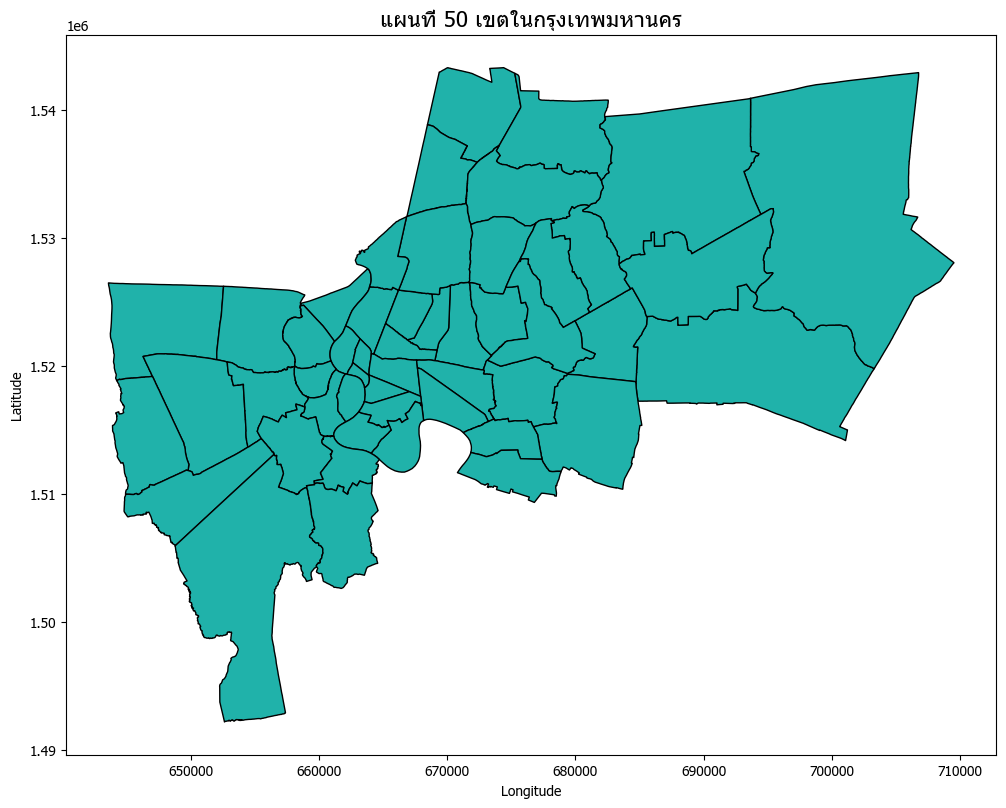

In [22]:
# ==============================================================================
# FlowCast Project: 02_bkk_data_exploration.ipynb (Fixing Thai Font & Encoding)
#
# เป้าหมาย: โหลด Shapefile ให้แสดงผลภาษาไทยถูกต้อง และตั้งค่าฟอนต์สำหรับกราฟ
# ==============================================================================

import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import zipfile
import io

# --- 1. ตั้งค่าให้ Matplotlib รู้จักฟอนต์ภาษาไทย ---
# เราจะตั้งค่าฟอนต์เริ่มต้นสำหรับทุกกราฟที่จะวาดหลังจากนี้
# หมายเหตุ: ชื่อฟอนต์อาจแตกต่างกันไปในแต่ละเครื่อง (macOS/Windows)
# ลองใช้ 'Tahoma', 'Leelawadee UI', หรือ 'TH SarabunPSK'
plt.rcParams['font.family'] = 'Tahoma'
print("Libraries imported and Thai font configured for plotting!")

# 2. กำหนด URL สำหรับดาวน์โหลดไฟล์ .zip
zip_file_url = "https://data.bangkok.go.th/dataset/e537025b-1cf6-4c5b-8e46-c2e976f13283/resource/d7be7e84-9d84-4595-bf8f-79b0bc01f1ae/download/district-2.zip"

print(f"Attempting to download zip file from: {zip_file_url}")

try:
    # 3. ดาวน์โหลดและแตกไฟล์ในหน่วยความจำ
    response = requests.get(zip_file_url)
    response.raise_for_status()
    zip_in_memory = io.BytesIO(response.content)
    print("✅ Zip file downloaded successfully.")

    # 4. **จุดแก้ไขสำคัญ:** เพิ่ม encoding='TIS-620' ตอนอ่านไฟล์
    # TIS-620 คือมาตรฐานการเข้ารหัสภาษาไทยที่นิยมใช้ในไฟล์จากหน่วยงานราชการ
    gdf_bkk = gpd.read_file(zip_in_memory, encoding='TIS-620')

    print("🎉 Success! Shapefile loaded with correct Thai encoding.")

    # 5. แสดงผลข้อมูลและแผนที่
    print("\n--- First 5 rows of the data (with correct Thai) ---")
    display(gdf_bkk.head())

    print("\n--- Plotting Bangkok Districts Map (with correct Thai title) ---")
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    gdf_bkk.plot(ax=ax, edgecolor='black', facecolor='lightseagreen')
    
    ax.set_title("แผนที่ 50 เขตในกรุงเทพมหานคร", fontsize=16)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    plt.show()

except Exception as e:
    print(f"❌ An error occurred: {e}")

In [24]:
# ==============================================================================
# FlowCast Project: Exploring Bangkok Canal Data (Fixing Encoding)
#
# เป้าหมาย: โหลดข้อมูลคลองในกรุงเทพฯ โดยใช้ encoding ที่ถูกต้อง
# ==============================================================================

import pandas as pd

print("Library imported successfully!")

# 1. กำหนด URL สำหรับดาวน์โหลดไฟล์ .csv
canal_csv_url = "https://data.bangkok.go.th/dataset/1f7197eb-81ae-4f8d-bd88-65a90534b8ab/resource/06ca01be-1c1f-419d-a514-e05cd0557484/download/canal.csv"

print(f"Attempting to load CSV data from: {canal_csv_url}")

try:
    # 2. **จุดแก้ไขสำคัญ:** เปลี่ยน encoding เป็น 'utf-8'
    # UTF-8 เป็นมาตรฐานสากลที่รองรับตัวอักษรได้หลากหลายภาษา
    df_canals = pd.read_csv(canal_csv_url, encoding='utf-8')

    print("✅ Success! Canal data loaded into DataFrame.")

    # 3. แสดงผลข้อมูลเบื้องต้นเพื่อทำความเข้าใจ
    print("\n--- First 5 rows of the canal data ---")
    display(df_canals.head())

    print("\n--- Data types, non-null values, and memory usage ---")
    df_canals.info()
    
    # 4. ลองดูข้อมูลสรุปทางสถิติ
    print("\n--- Descriptive statistics ---")
    display(df_canals.describe())

except UnicodeDecodeError:
    print("❌ Failed to decode using 'utf-8'. The file might have a different encoding.")
except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")

Library imported successfully!
Attempting to load CSV data from: https://data.bangkok.go.th/dataset/1f7197eb-81ae-4f8d-bd88-65a90534b8ab/resource/06ca01be-1c1f-419d-a514-e05cd0557484/download/canal.csv
✅ Success! Canal data loaded into DataFrame.

--- First 5 rows of the canal data ---


,id_canal,name_canal,Water Storage,TEMP_54,TEMP_55,TEMP_56,TEMP_57,pH_54,pH_55,pH_56,pH_57,DO_54,DO_55,DO_56,DO_57,H2S_54,H2S_55,H2S_56,H2S_57,BOD_54,BOD_55,BOD_56,BOD_57,COD_54,COD_55,COD_56,COD_57,SS_54,SS_55,SS_56,SS_57,TKN_54,TKN_55,TKN_56,TKN_57,NH3N_54,NH3N_55,NH3N_56,NH3N_57,NO2_54,NO2_55,NO2_56,NO2_57,NO3_54,NO3_55,NO3_56,NO3_57,T-P_54,T-P_55,T-P_56,T-P_57
0,1,คลองกรวย,ซ.เจริญกรุง 71,28.8,29.1,29.4,29.8,7.0,6.9,7.4,7.2,0.9,0.0,1.5,1.0,0.2,0.2,1.0,0.2,18.8,38.2,17.5,25.4,71.3,199.1,193.8,109.5,20.2,84.5,24.9,34.2,11.4,11.0,11.2,10.9,7.8,7.5,8.3,7.9,0.1,0.2,0.2,0.2,2.2,2.2,2.8,2.5,0.6,1.3,1.0,1.1
1,2,คลองกุ่ม,หมู่บ้านสหกรณ์ (ซ.28),29.4,29.0,29.4,29.3,7.1,7.2,7.5,7.5,0.7,0.5,0.0,0.5,0.2,0.1,2.4,2.5,20.2,32.5,36.1,24.5,77.0,121.3,246.4,93.3,25.1,32.6,27.8,25.5,9.5,13.7,25.9,23.7,6.1,11.0,23.2,18.8,0.0,0.1,0.1,0.0,2.5,2.4,2.6,2.8,0.9,1.4,1.7,1.3
2,3,คลองกุ่ม,ถ.สุขาภิบาล 2,29.4,29.0,29.4,29.3,7.1,7.1,7.5,7.4,0.6,2.1,1.9,1.5,0.2,0.1,0.1,1.3,18.3,14.5,13.8,18.1,69.3,84.0,97.8,73.6,27.0,27.2,22.3,21.3,8.9,10.0,13.2,16.6,6.0,6.1,9.5,13.4,0.1,0.4,0.3,0.2,2.6,2.1,2.2,2.7,0.8,1.0,1.3,1.3
3,4,คลองเกร็ด,ถ.ปัญญา - เนเจอรัลปาร์ค,30.7,29.3,29.6,29.0,7.0,7.0,7.3,7.2,0.9,0.6,0.1,0.1,0.8,0.1,1.4,3.1,12.4,10.4,11.4,14.4,38.9,58.2,83.5,56.5,9.0,21.5,10.9,11.2,7.7,7.5,14.4,13.7,4.4,4.8,11.2,11.4,0.1,0.2,0.3,0.1,2.5,2.2,2.3,2.6,0.5,0.8,1.2,1.0
4,5,คลองขวาง,ถ.เจริญกรุง 72,28.8,29.1,29.4,29.8,7.1,6.9,7.4,7.2,0.4,0.5,0.1,0.3,0.2,0.2,1.2,0.4,21.2,24.9,28.9,24.1,73.3,93.2,140.6,90.1,18.7,39.1,18.4,23.4,12.4,9.1,15.2,12.9,8.8,6.0,12.5,10.2,0.1,0.2,0.2,0.1,2.6,1.9,2.3,2.3,0.7,1.1,1.2,1.6



--- Data types, non-null values, and memory usage ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_canal       303 non-null    int64  
 1   name_canal     303 non-null    object 
 2   Water Storage  303 non-null    object 
 3   TEMP_54        303 non-null    float64
 4   TEMP_55        303 non-null    float64
 5   TEMP_56        303 non-null    float64
 6   TEMP_57        303 non-null    float64
 7   pH_54          303 non-null    float64
 8   pH_55          303 non-null    float64
 9   pH_56          303 non-null    float64
 10  pH_57          303 non-null    float64
 11  DO_54          303 non-null    float64
 12  DO_55          303 non-null    float64
 13  DO_56          303 non-null    float64
 14  DO_57          303 non-null    float64
 15  H2S_54         303 non-null    float64
 16  H2S_55         303 non-null    float64
 17 

,id_canal,TEMP_54,TEMP_55,TEMP_56,TEMP_57,pH_54,pH_55,pH_56,pH_57,DO_54,DO_55,DO_56,DO_57,H2S_54,H2S_55,H2S_56,H2S_57,BOD_54,BOD_55,BOD_56,BOD_57,COD_54,COD_55,COD_56,COD_57,SS_54,SS_55,SS_56,SS_57,TKN_54,TKN_55,TKN_56,TKN_57,NH3N_54,NH3N_55,NH3N_56,NH3N_57,NO2_54,NO2_55,NO2_56,NO2_57,NO3_54,NO3_55,NO3_56,NO3_57,T-P_54,T-P_55,T-P_56,T-P_57
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,27.823762,27.687459,27.877228,29.560726,6.721122,6.663696,6.975248,7.238944,1.634983,1.846535,1.877228,1.615842,0.163036,0.054455,0.269307,0.507921,9.562376,10.558086,10.131023,12.404950,51.779868,60.416502,89.042904,63.295710,18.825083,25.153465,19.157756,23.074257,5.339604,5.175248,7.073927,8.313861,2.833663,2.757426,4.580528,5.549175,0.232343,0.267987,0.234323,0.169637,1.779208,1.674917,1.810891,1.861386,0.717822,0.818812,0.982838,0.970957
std,87.612784,7.045817,7.007421,7.039715,1.759706,1.703682,1.692954,1.758559,0.442975,1.158883,1.303223,1.375896,1.147621,0.340461,0.109355,0.480909,0.990286,6.922880,9.378392,8.153979,9.108017,23.648458,30.356543,45.648188,28.852554,9.521055,25.891674,15.045694,16.763538,3.458211,3.381447,4.680134,5.777257,2.684920,2.689248,4.173099,4.557171,0.259029,0.158422,0.147417,0.113065,0.941218,0.836243,1.024912,0.881559,0.506722,0.541224,0.527868,0.434309
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,76.500000,28.800000,28.850000,29.100000,29.300000,7.000000,6.900000,7.300000,7.200000,0.650000,0.600000,0.600000,0.600000,0.000000,0.000000,0.000000,0.000000,5.850000,5.550000,6.000000,7.700000,36.850000,45.100000,62.250000,51.150000,13.700000,15.300000,13.300000,17.300000,2.900000,2.700000,2.800000,3.000000,0.800000,0.800000,1.000000,1.100000,0.100000,0.200000,0.100000,0.100000,0.700000,0.850000,0.550000,1.700000,0.400000,0.400000,0.600000,0.700000
50%,152.000000,29.400000,29.200000,29.500000,29.700000,7.100000,7.000000,7.400000,7.200000,1.600000,2.000000,2.000000,1.600000,0.000000,0.000000,0.000000,0.100000,8.000000,7.800000,7.600000,10.200000,51.500000,57.500000,83.000000,58.300000,17.700000,22.600000,15.500000,20.800000,4.800000,4.400000,6.500000,7.800000,2.300000,1.700000,3.900000,5.000000,0.100000,0.200000,0.200000,0.100000,2.100000,2.000000,2.100000,2.100000,0.600000,0.700000,1.000000,0.900000
75%,227.500000,30.300000,29.400000,30.000000,30.000000,7.200000,7.200000,7.500000,7.400000,2.500000,2.900000,2.900000,2.400000,0.200000,0.100000,0.350000,0.700000,11.150000,12.250000,11.850000,13.150000,65.650000,70.900000,111.300000,69.300000,22.650000,28.750000,20.900000,24.300000,7.000000,6.950000,10.150000,11.400000,3.800000,4.300000,7.200000,8.450000,0.300000,0.400000,0.300000,0.200000,2.400000,2.200000,2.500000,2.400000,0.900000,1.300000,1.350000,1.300000
max,303.000000,30.900000,31.200000,31.100000,30.700000,7.800000,7.600000,7.800000,7.900000,4.600000,6.700000,6.500000,5.900000,2.700000,0.600000,3.100000,11.600000,52.500000,61.400000,47.500000,103.300000,173.600000,199.100000,287.500000,361.300000,62.300000,402.500000,181.800000,276.000000,22.300000,17.100000,25.900000,56.900000,17.200000,13.200000,23.200000,25.400

Libraries imported successfully!
Attempting to download flood points data from: https://data.bangkok.go.th/dataset/36256cdf-5576-4b17-9c4a-ddde6c7ff343/resource/b8f2058d-e562-421e-a4cf-1dd706c3ba8a/download/flood_point.zip
✅ Flood points zip file downloaded successfully.
🎉 Success! Flood points data loaded into GeoDataFrame.

--- First 5 rows of the flood points data ---


,id_flood,location,dcode,scode,geometry
0,001,จุดอ่อนน้ำท่วมดอนเมืองอนุสรสถาน,1036,103605,POINT (674982.813 1542933.854)
1,002,จุดอ่อนน้ำท่วมแจ้งวัฒนะ,1041,104105,POINT (668776.356 1536365.74)
2,003,จุดอ่อนน้ำท่วมพหลโยธินแยกเกษตร,1030,103001,POINT (670138.195 1530585.771)
3,004,จุดอ่อนน้ำท่วมลาดพร้าว บางกะปิ นวมินทร์,1006,100601,POINT (678159.488 1522497.853)
4,005,ขุดอ่อนน้ำท่วมพหลโยธินสนามเป้า,1014,101401,POINT (666492.959 1522607.488)



--- Plotting Flood Vulnerability Points on Bangkok Map ---


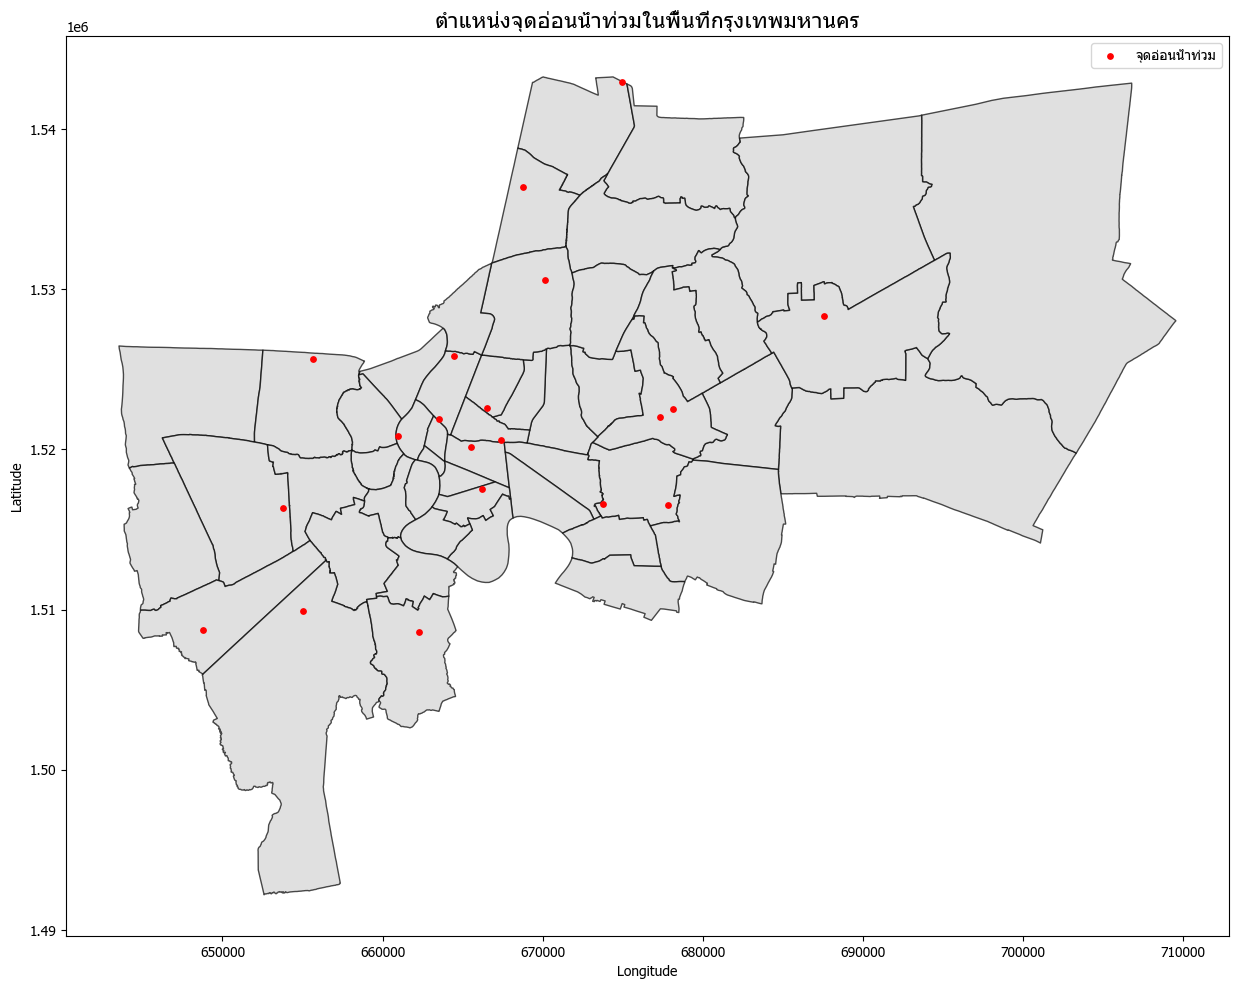

In [25]:
# ==============================================================================
# FlowCast Project: Exploring Flood Vulnerability Points
#
# เป้าหมาย: โหลดข้อมูลจุดอ่อนน้ำท่วม และนำมาแสดงผลบนแผนที่เขตของกรุงเทพฯ
# ==============================================================================

import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import zipfile
import io

print("Libraries imported successfully!")

# 1. กำหนด URL สำหรับดาวน์โหลดไฟล์ .zip ของจุดอ่อนน้ำท่วม
flood_points_url = "https://data.bangkok.go.th/dataset/36256cdf-5576-4b17-9c4a-ddde6c7ff343/resource/b8f2058d-e562-421e-a4cf-1dd706c3ba8a/download/flood_point.zip"

print(f"Attempting to download flood points data from: {flood_points_url}")

try:
    # 2. ดาวน์โหลดและแตกไฟล์ในหน่วยความจำ
    response = requests.get(flood_points_url)
    response.raise_for_status()
    zip_in_memory = io.BytesIO(response.content)
    print("✅ Flood points zip file downloaded successfully.")

    # 3. โหลดข้อมูล Shapefile ของจุดอ่อนน้ำท่วม (ลองใช้ TIS-620 ก่อน)
    gdf_flood_points = gpd.read_file(zip_in_memory, encoding='TIS-620')
    print("🎉 Success! Flood points data loaded into GeoDataFrame.")

    # 4. แสดงผลข้อมูลเบื้องต้น
    print("\n--- First 5 rows of the flood points data ---")
    display(gdf_flood_points.head())

    # 5. **ขั้นตอนสำคัญ:** แสดงผลข้อมูลจุดอ่อนน้ำท่วมลงบนแผนที่เขต
    print("\n--- Plotting Flood Vulnerability Points on Bangkok Map ---")
    
    # สร้าง Figure และ Axes สำหรับวาดแผนที่
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    
    # วาดแผนที่เขตเป็นพื้นหลัง (Base map) - ใช้ตัวแปร gdf_bkk จาก cell ก่อนหน้า
    gdf_bkk.plot(ax=ax, edgecolor='black', facecolor='lightgray', alpha=0.7)
    
    # วาดข้อมูลจุดอ่อนน้ำท่วมทับลงไป
    gdf_flood_points.plot(ax=ax, marker='o', color='red', markersize=15, label='จุดอ่อนน้ำท่วม')
    
    ax.set_title("ตำแหน่งจุดอ่อนน้ำท่วมในพื้นที่กรุงเทพมหานคร", fontsize=16)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.legend()
    plt.show()

except Exception as e:
    print(f"❌ An error occurred: {e}")

In [32]:
# ==============================================================================
# FlowCast Project: Master Data Retrieval Script via CKAN API
#
# เป้าหมาย: ดึง URL ดาวน์โหลดของชุดข้อมูลสำคัญทั้งหมดที่เราต้องการโดยอัตโนมัติ
# ==============================================================================

import requests
import pprint

print("Libraries imported successfully!")

# 1. รายชื่อชุดข้อมูลเป้าหมายของเรา (ใช้ชื่อสั้นๆ จาก URL ที่คุณให้มา)
dataset_names = [
    "50",            # ขอบเขต 50 เขต
    "floodpoint",    # จุดอ่อนน้ำท่วม
    "pumpstation",   # สถานีสูบน้ำ
    "floodgate",     # ประตูระบายน้ำ
    "canal",         # คลอง
    "bmazone"        # กลุ่มเขต
]

# 2. กำหนด API Endpoint ของ BMA Data Portal
ckan_api_base_url = "https://data.bangkok.go.th/api/3/action/"
action = "package_search"
search_url = ckan_api_base_url + action

print("--- Starting Data Retrieval Mission ---")

# 3. วนลูปเพื่อค้นหาข้อมูลแต่ละชุด
for name in dataset_names:
    print(f"\n🔎 Searching for dataset: '{name}'...")
    
    params = {"q": name}
    
    try:
        response = requests.get(search_url, params=params)
        response.raise_for_status()
        search_data = response.json()
        
        if search_data.get("success") and search_data['result']['results']:
            # เอาผลลัพธ์ที่ตรงที่สุด (อันแรก)
            dataset = search_data['result']['results'][0]
            
            print(f"  ✅ Found Dataset: {dataset.get('title')}")
            
            if dataset.get('resources'):
                print("  --- Downloadable Resources ---")
                for resource in dataset['resources']:
                    # เราจะสนใจไฟล์ที่เป็น Shapefile (zip) หรือ CSV เป็นพิเศษ
                    res_format = resource.get('format', 'N/A').upper()
                    if res_format in ['SHP', 'ZIP', 'CSV']:
                        print(f"    - Format: {res_format}")
                        print(f"      Name: {resource.get('name')}")
                        print(f"      URL: {resource.get('url')}")
            else:
                print("    - No downloadable resources found.")
        else:
            print(f"  ❌ Dataset '{name}' not found.")

    except requests.exceptions.RequestException as e:
        print(f"  ❌ An error occurred for '{name}': {e}")

print("\n--- Data Retrieval Mission Complete ---")

Libraries imported successfully!
--- Starting Data Retrieval Mission ---

🔎 Searching for dataset: '50'...
  ✅ Found Dataset: พื้นที่เขตปกครอง 50 เขตของกรุงเทพมหานคร
  --- Downloadable Resources ---
    - Format: CSV
      Name: พื้นที่เขตปกครอง 50 เขตของกรุงเทพมหานคร
      URL: https://data.bangkok.go.th/dataset/e537025b-1cf6-4c5b-8e46-c2e976f13283/resource/7bf56a08-044f-4287-b10e-c2beefccdfcc/download/50district.csv

🔎 Searching for dataset: 'floodpoint'...
  ✅ Found Dataset: จุดอ่อนน้ำท่วมในพื้นที่เขตกรุงเทพมหานคร
  --- Downloadable Resources ---
    - Format: ZIP
      Name: จุดอ่อนน้ำท่วมในพื้นที่เขตกรุงเทพมหานคร
      URL: https://data.bangkok.go.th/dataset/36256cdf-5576-4b17-9c4a-ddde6c7ff343/resource/b8f2058d-e562-421e-a4cf-1dd706c3ba8a/download/flood_point.zip

🔎 Searching for dataset: 'pumpstation'...
  ✅ Found Dataset: ที่ตั้งบ่อสูบน้ำในพื้นที่กรุงเทพมหานคร
  --- Downloadable Resources ---
    - Format: ZIP
      Name: ที่ตั้งบ่อสูบน้ำในพื้นที่กรุงเทพมหานคร
      URL: https:

In [ ]:
# ==============================================================================
# FlowCast Project: 03_Data_Loading_and_Integration.ipynb
#
# เป้าหมาย: โหลดชุดข้อมูลสำคัญทั้งหมดจาก URL ที่เราได้มา
#          และเตรียมพร้อมสำหรับขั้นตอนการทำความสะอาดและเชื่อมโยงข้อมูล
# ==============================================================================

import pandas as pd
import geopandas as gpd
import requests
import io

print("Libraries imported successfully!")

# 1. สร้าง "แคตตาล็อกข้อมูล" ของเราจาก URL ที่หามาได้
data_urls = {
    "districts": {
        "url": "https://data.bangkok.go.th/dataset/e537025b-1cf6-4c5b-8e46-c2e976f13283/resource/d7be7e84-9d84-4595-bf8f-79b0bc01f1ae/download/district-2.zip",
        "type": "shapefile"
    },
    "flood_points": {
        "url": "https://data.bangkok.go.th/dataset/36256cdf-5576-4b17-9c4a-ddde6c7ff343/resource/b8f2058d-e562-421e-a4cf-1dd706c3ba8a/download/flood_point.zip",
        "type": "shapefile"
    },
    "flood_gate": {
        "url": "https://data.bangkok.go.th/dataset/36256cdf-5576-4b17-9c4a-ddde6c7ff343/resource/b8f2058d-e562-421e-a4cf-1dd706c3ba8a/download/floodgate.zip",
        "type": "csv"
    },
    "pump_stations": {
        "url": "https://data.bangkok.go.th/dataset/82cb9fcc-ddea-436a-abfa-eb5dc9fc85fc/resource/739e6a23-3aa7-4b84-bbfb-bc8fd7cd692b/download/pump_sta.zip",
        "type": "shapefile"
    },
     "canals": {
        "url": "https://data.bangkok.go.th/dataset/1f7197eb-81ae-4f8d-bd88-65a90534b8ab/resource/06ca01be-1c1f-419d-a514-e05cd0557484/download/canal.csv",
        "type": "csv"
    }
    # เราสามารถเพิ่มข้อมูลประตูระบายน้ำ (floodgate) เข้ามาได้อีกในอนาคต
}

# 2. สร้าง Dictionary ว่างๆ เพื่อเก็บ DataFrame ของเรา
dataframes = {}

print("--- Starting Data Loading Process ---")

# 3. วนลูปเพื่อโหลดข้อมูลแต่ละชุด
for name, info in data_urls.items():
    print(f"\n⏳ Loading '{name}' data...")
    try:
        if info['type'] == 'shapefile':
            # ใช้เทคนิคเดิมในการโหลด Shapefile จาก zip ใน memory
            response = requests.get(info['url'])
            response.raise_for_status()
            zip_in_memory = io.BytesIO(response.content)
            # ใช้ TIS-620 เป็น encoding เริ่มต้นสำหรับ Shapefile
            df = gpd.read_file(zip_in_memory, encoding='TIS-620')
        
        elif info['type'] == 'csv':
            # ใช้ UTF-8 เป็น encoding เริ่มต้นสำหรับ CSV
            df = pd.read_csv(info['url'], encoding='utf-8')
            
        # เก็บ DataFrame ที่โหลดสำเร็จแล้วเข้าไปใน Dictionary
        dataframes[name] = df
        print(f"  ✅ Successfully loaded '{name}' data.")
        
    except Exception as e:
        print(f"  ❌ Failed to load '{name}' data. Error: {e}")

print("\n--- Data Loading Process Complete ---")

# 4. แสดงผลเพื่อตรวจสอบว่าข้อมูลทุกชุดเข้ามาครบถ้วน
print("\n--- Verifying Loaded DataFrames ---")
for name, df in dataframes.items():
    print(f"\n--- {name.upper()} Data ---")
    print(f"Shape: {df.shape}")
    display(df.head(3))

Libraries imported successfully!
--- Starting Data Loading Process ---

⏳ Loading 'districts' data...
  ✅ Successfully loaded 'districts' data.

⏳ Loading 'flood_points' data...
  ✅ Successfully loaded 'flood_points' data.

⏳ Loading 'pump_stations' data...
  ✅ Successfully loaded 'pump_stations' data.

⏳ Loading 'canals' data...
  ✅ Successfully loaded 'canals' data.

--- Data Loading Process Complete ---

--- Verifying Loaded DataFrames ---

--- DISTRICTS Data ---
Shape: (50, 15)


,OBJECTID,AREA,dcode,dname,dname_e,pcode,pname,num_male,num_female,num_school,num_hos,num_comm,num_temple,num_health,geometry
0,29,11804564.0,1025,เขตบางพลัด,Bang Phlat,10,กรุงเทพมหานคร,45904.0,53249.0,11.0,0.0,46.0,23.0,1.0,"POLYGON ((663924.794 1526162.057, 663895.856 1..."
1,30,16319268.0,1017,เขตห้วยขวาง,Huai Khwang,10,กรุงเทพมหานคร,35884.0,42323.0,3.0,0.0,25.0,3.0,2.0,"POLYGON ((671711.864 1526487.438, 671710.552 1..."
2,31,17075578.0,1045,เขตวังทองหลาง,Wang Thong Lang,10,กรุงเทพมหานคร,52758.0,61990.0,3.0,0.0,19.0,1.0,0.0,"POLYGON ((674358.118 1525633.939, 674369.43 15..."



--- FLOOD_POINTS Data ---
Shape: (20, 5)


,id_flood,location,dcode,scode,geometry
0,001,จุดอ่อนน้ำท่วมดอนเมืองอนุสรสถาน,1036,103605,POINT (674982.813 1542933.854)
1,002,จุดอ่อนน้ำท่วมแจ้งวัฒนะ,1041,104105,POINT (668776.356 1536365.74)
2,003,จุดอ่อนน้ำท่วมพหลโยธินแยกเกษตร,1030,103001,POINT (670138.195 1530585.771)



--- PUMP_STATIONS Data ---
Shape: (16, 7)


,id_pump,name,dcode,capacity,location,function,geometry
0,015,สถานีสูบน้ำสามเสน,1002,15 เครื่อง 3 ลูกบาศก์เมตร/วินาที,ปากคลองสามเสน ถ.ขาว แขวงวชิรพยาบาล เขตดุสิต,การสูบระบายน้ำออกจากคลองสามเสน,POINT (662857.387 1524131.193)
1,014,สถานีสูบน้ำบางซื่อ,1002,17 เครื่อง 3 ลูกบาศก์เมตร/วินาที,ปากคลองบางซื่อ ติดวัดแก้วฟ้าจุฬามณี เขตบางซื่อ,การสูบน้ำออกจากคลองบางซื่อ ซึ่งเป็นคลองหลักและ...,POINT (664138.694 1526140.564)
2,007,สถานีสูบน้ำพระราม 4,1033,4 เครื่อง,พื้นที่การรถไฟแห่งประเทศไทย ถ.เชื้อเพลิง แขวงค...,การสูบระบายน้ำควบคุมระดับน้ำในอุโมงค์รับน้ำแนว...,POINT (668116.26 1516247.588)



--- CANALS Data ---
Shape: (303, 51)


,id_canal,name_canal,Water Storage,TEMP_54,TEMP_55,TEMP_56,TEMP_57,pH_54,pH_55,pH_56,pH_57,DO_54,DO_55,DO_56,DO_57,H2S_54,H2S_55,H2S_56,H2S_57,BOD_54,BOD_55,BOD_56,BOD_57,COD_54,COD_55,COD_56,COD_57,SS_54,SS_55,SS_56,SS_57,TKN_54,TKN_55,TKN_56,TKN_57,NH3N_54,NH3N_55,NH3N_56,NH3N_57,NO2_54,NO2_55,NO2_56,NO2_57,NO3_54,NO3_55,NO3_56,NO3_57,T-P_54,T-P_55,T-P_56,T-P_57
0,1,คลองกรวย,ซ.เจริญกรุง 71,28.8,29.1,29.4,29.8,7.0,6.9,7.4,7.2,0.9,0.0,1.5,1.0,0.2,0.2,1.0,0.2,18.8,38.2,17.5,25.4,71.3,199.1,193.8,109.5,20.2,84.5,24.9,34.2,11.4,11.0,11.2,10.9,7.8,7.5,8.3,7.9,0.1,0.2,0.2,0.2,2.2,2.2,2.8,2.5,0.6,1.3,1.0,1.1
1,2,คลองกุ่ม,หมู่บ้านสหกรณ์ (ซ.28),29.4,29.0,29.4,29.3,7.1,7.2,7.5,7.5,0.7,0.5,0.0,0.5,0.2,0.1,2.4,2.5,20.2,32.5,36.1,24.5,77.0,121.3,246.4,93.3,25.1,32.6,27.8,25.5,9.5,13.7,25.9,23.7,6.1,11.0,23.2,18.8,0.0,0.1,0.1,0.0,2.5,2.4,2.6,2.8,0.9,1.4,1.7,1.3
2,3,คลองกุ่ม,ถ.สุขาภิบาล 2,29.4,29.0,29.4,29.3,7.1,7.1,7.5,7.4,0.6,2.1,1.9,1.5,0.2,0.1,0.1,1.3,18.3,14.5,13.8,18.1,69.3,84.0,97.8,73.6,27.0,27.2,22.3,21.3,8.9,10.0,13.2,16.6,6.0,6.1,9.5,13.4,0.1,0.4,0.3,0.2,2.6,2.1,2.2,2.7,0.8,1.0,1.3,1.3


In [29]:
# ==============================================================================
# FlowCast Project: Data Preprocessing Step 1 - Check CRS
#
# เป้าหมาย: ตรวจสอบระบบพิกัด (CRS) ของ GeoDataFrames ทั้งหมด
# ==============================================================================

print("--- Checking Coordinate Reference Systems (CRS) ---")

# ดึง GeoDataFrame จาก Dictionary ของเรา
gdf_districts = dataframes['districts']
gdf_flood_points = dataframes['flood_points']
gdf_pump_stations = dataframes['pump_stations']

# พิมพ์ค่า CRS ของแต่ละ GeoDataFrame ออกมาดู
print(f"Districts CRS:      {gdf_districts.crs}")
print(f"Flood Points CRS:   {gdf_flood_points.crs}")
print(f"Pump Stations CRS:  {gdf_pump_stations.crs}")

# ตรวจสอบว่า CRS ทั้งหมดตรงกันหรือไม่
if gdf_districts.crs == gdf_flood_points.crs == gdf_pump_stations.crs:
    print("\n✅ Success! All geospatial datasets share the same CRS.")
else:
    print("\n⚠️ Warning! CRS mismatch detected. They need to be standardized.")

--- Checking Coordinate Reference Systems (CRS) ---
Districts CRS:      EPSG:32647
Flood Points CRS:   EPSG:32647
Pump Stations CRS:  EPSG:32647

✅ Success! All geospatial datasets share the same CRS.


In [30]:
# ==============================================================================
# FlowCast Project: Feature Engineering Step 1 - Spatial Joins
#
# เป้าหมาย: สร้างฟีเจอร์ใหม่โดยการนับจำนวนจุดอ่อนน้ำท่วมและสถานีสูบน้ำในแต่ละเขต
# ==============================================================================

print("--- Starting Feature Engineering: Spatial Joins ---")

# 1. เตรียม GeoDataFrames จาก Dictionary ของเรา
gdf_districts = dataframes['districts'].copy() # ใช้ .copy() เพื่อป้องกันการแก้ไขข้อมูลต้นฉบับ
gdf_flood_points = dataframes['flood_points'].copy()
gdf_pump_stations = dataframes['pump_stations'].copy()

# 2. ทำ Spatial Join เพื่อหาว่าแต่ละ "จุด" อยู่ใน "เขต" ไหน
#    เราจะ join จุดอ่อนน้ำท่วม (points) เข้ากับแผนที่เขต (polygons)
joined_flood_points = gpd.sjoin(gdf_flood_points, gdf_districts, how="inner", predicate='within')
print("✅ Spatial join for flood points complete.")

#    ทำเช่นเดียวกันกับสถานีสูบน้ำ
joined_pump_stations = gpd.sjoin(gdf_pump_stations, gdf_districts, how="inner", predicate='within')
print("✅ Spatial join for pump stations complete.")

# 3. นับจำนวนจุดในแต่ละเขต
#    เราจะนับว่าชื่อเขต (dname) แต่ละชื่อปรากฏขึ้นกี่ครั้งหลังจากการ join
flood_point_counts = joined_flood_points['dname'].value_counts().reset_index()
flood_point_counts.columns = ['dname', 'flood_point_count'] # เปลี่ยนชื่อคอลัมน์ให้อ่านง่าย

pump_station_counts = joined_pump_stations['dname'].value_counts().reset_index()
pump_station_counts.columns = ['dname', 'pump_station_count'] # เปลี่ยนชื่อคอลัมน์

# 4. นำฟีเจอร์ใหม่ที่ได้กลับไปรวมกับตารางข้อมูลเขตหลัก
gdf_districts = gdf_districts.merge(flood_point_counts, on='dname', how='left')
gdf_districts = gdf_districts.merge(pump_station_counts, on='dname', how='left')

# 5. จัดการเขตที่ไม่มีจุดอ่อนหรือสถานีสูบน้ำ (จะได้ค่าเป็น NaN) โดยเติม 0 แทน
gdf_districts['flood_point_count'] = gdf_districts['flood_point_count'].fillna(0).astype(int)
gdf_districts['pump_station_count'] = gdf_districts['pump_station_count'].fillna(0).astype(int)

print("\n🎉 Success! New features created and merged.")

# 6. แสดงผล DataFrame ที่มีฟีเจอร์ใหม่เพิ่มเข้ามา
print("\n--- Districts DataFrame with new features ---")
display(gdf_districts[['dname', 'flood_point_count', 'pump_station_count']].sort_values(by='flood_point_count', ascending=False).head(10))

--- Starting Feature Engineering: Spatial Joins ---
✅ Spatial join for flood points complete.
✅ Spatial join for pump stations complete.

🎉 Success! New features created and merged.

--- Districts DataFrame with new features ---


,dname,flood_point_count,pump_station_count
48,เขตบางกะปิ,2,0
7,เขตดุสิต,2,2
16,เขตสวนหลวง,2,0
49,เขตทุ่งครุ,1,0
12,เขตพระนคร,1,1
27,เขตสาทร,1,0
33,เขตบางบอน,1,0
35,เขตบางขุนเทียน,1,0
36,เขตดอนเมือง,1,0
40,เขตหลักสี่,1,1


In [58]:
# ==============================================================================
# FlowCast Project: Fully Automated Data Ingestion Pipeline (with Manual Override)
#
# เป้าหมาย: รับรายชื่อชุดข้อมูล -> ถ้ามี URL ที่ระบุไว้ให้ใช้เลย -> ถ้าไม่มีให้ค้นหา
# ==============================================================================

import pandas as pd
import geopandas as gpd
import requests
import io

print("Libraries imported successfully!")

# 1. สร้าง "แคตตาล็อกข้อมูล" ของเรา โดยใส่ URL ที่เราหาเจอเองเข้าไปเลย
#    นี่คือช่องทางพิเศษ (Manual Override) ของเรา
data_catalog = {
    "districts": {
        "search_term": "50",
        "url": None # ปล่อยให้สคริปต์หาเอง
    },
    "bmazone": {
        "search_term": "bmazone",
        "url": None or "https://data.bangkok.go.th/dataset/6ff6277d-e945-4bec-a2e7-4ecee59526fd/resource/988a7284-7f2d-4b59-8a09-c262f1a03f46/download/bma_zone.zip" 
    },
    "flood_points": {
        "search_term": "floodpoint",
        "url": None # ปล่อยให้สคริปต์หาเอง
    },
    "pump_stations": {
        "search_term": "pumpstation",
        "url": None # ปล่อยให้สคริปต์หาเอง
    },
    "floodgate": {
        "search_term": "floodgate",
        "url": None or "https://data.bangkok.go.th/dataset/83ae5639-a37f-4e19-bd37-e1c97930f39d/resource/9ce9a608-c25c-49cc-80aa-4145f08effbf/download/floodgate.zip"
    },
    "canals": {
        "search_term": "canal",
        "url": None or "https://data.bangkok.go.th/dataset/1f7197eb-81ae-4f8d-bd88-65a90534b8ab/resource/06ca01be-1c1f-419d-a514-e05cd0557484/download/canal.csv"
    },
    "bangplad_pond": {
        "search_term": "bangplad_pond",
        "url": None 
    },
    "chatuchak_pond": {
        "search_term": "chatuchak_pond",
        "url": None or "https://data.bangkok.go.th/dataset/5750ff95-eccd-4f16-aa6b-631ea995d7e0/resource/ffe7c8f4-d21a-41c0-acba-a924da98223e/download/9.3-.csv"
    },
    "khlong_toei_pond": {
        "search_term": "chatuchak_pond",
        "url": None or "https://data.bangkok.go.th/dataset/52073f25-e324-445c-aab8-4f4f4e27a0b8/resource/4058205b-c5c5-4489-af87-fc951889c12f/download/dkt_5ecf769b3979f.csv"
    },
    "lat_krabang_pond": {
        "search_term": "chatuchak_pond",
        "url": None or "https://data.bangkok.go.th/dataset/592c2885-dbc4-4bae-aafc-578069f0c372/resource/598e8bbb-8445-45a9-aefc-7b47b763faa0/download/.csv"
    },
    "pond": { #ข้อมูลแหล่งน้ำเขตพระนคร
        "search_term": "pond",
        "url": "https://data.bangkok.go.th/dataset/68867196-d220-4384-955d-033728bc875c/resource/48ee0fc3-d0bc-411b-a542-c86c133fd69f/download/.csv"
    },
    "frd_dds": {
        "search_term": "frd_dds",
        "url": "https://data.bangkok.go.th/dataset/68867196-d220-4384-955d-033728bc875c/resource/48ee0fc3-d0bc-411b-a542-c86c133fd69f/download/.csv"
    },
    "igd-20": { #ความพร้อมของเครื่องสูบน้ำของกรุงเทพมหานคร
        "search_term": "igd-20",
        "url": "https://data.bangkok.go.th/dataset/05b576a3-c2b1-4f03-8b1f-24104d208c1d/resource/a68f0b2d-2a0b-4694-ac1c-91da29c81853/download/5.-.csv"
    },
}

# 2. กำหนดค่าคงที่สำหรับ CKAN API
CKAN_API_BASE_URL = "https://data.bangkok.go.th/api/3/action/"
SEARCH_ACTION = "package_search"
SEARCH_URL = CKAN_API_BASE_URL + SEARCH_ACTION

# 3. สร้าง Dictionary ว่างๆ เพื่อเก็บ DataFrame
dataframes = {}

print("--- Starting Robust Data Ingestion Pipeline ---")

# 4. วนลูปเพื่อจัดการข้อมูลแต่ละชุด
for name, info in data_catalog.items():
    print(f"\n--- Processing Dataset: '{name}' ---")
    
    try:
        resource_url = info.get('url')
        resource_format = None

        # --- ส่วนที่ 1: ค้นหา URL (ถ้ายังไม่มี) ---
        if not resource_url:
            print(f"🔎 URL not provided. Searching via CKAN API with term '{info['search_term']}'...")
            params = {"q": info['search_term']}
            response = requests.get(SEARCH_URL, params=params)
            response.raise_for_status()
            search_data = response.json()
            
            if search_data.get("success") and search_data['result']['results']:
                dataset = search_data['result']['results'][0]
                for resource in dataset.get('resources', []):
                    res_format_upper = resource.get('format', '').upper()
                    if res_format_upper in ['SHP', 'ZIP']:
                        resource_url = resource.get('url')
                        resource_format = 'shapefile'
                        break
                    elif res_format_upper == 'CSV':
                        resource_url = resource.get('url')
                        resource_format = 'csv'
                
                if not resource_url: raise ValueError("No suitable resource found.")
                print(f"  ✅ URL found automatically.")
            else:
                raise ValueError("Dataset not found via API.")
        else:
            print("  ✅ Using manually provided URL.")
            # เดา format จากนามสกุลไฟล์
            if resource_url.endswith('.zip'): resource_format = 'shapefile'
            elif resource_url.endswith('.csv'): resource_format = 'csv'

        # --- ส่วนที่ 2: โหลดข้อมูลจาก URL ---
        print(f"⏳ Loading data from URL...")
        
        if resource_format == 'shapefile':
            response = requests.get(resource_url)
            response.raise_for_status()
            zip_in_memory = io.BytesIO(response.content)
            df = gpd.read_file(zip_in_memory, encoding='TIS-620')
        
        elif resource_format == 'csv':
            df = pd.read_csv(resource_url, encoding='utf-8')
        else:
            raise ValueError(f"Unknown format for URL: {resource_url}")
            
        dataframes[name] = df
        print(f"  🎉 Successfully processed and loaded '{name}' data.")

    except Exception as e:
        print(f"  ❌ Failed to process '{name}'. Error: {e}")

print("\n--- Pipeline Complete ---")

# 5. ตรวจสอบผลลัพธ์
print("\n--- Verifying All Loaded DataFrames ---")
for name, df in dataframes.items():
    print(f"\n--- {name.upper()} Data ---")
    display(df.head(2))

Libraries imported successfully!
--- Starting Robust Data Ingestion Pipeline ---

--- Processing Dataset: 'districts' ---
🔎 URL not provided. Searching via CKAN API with term '50'...
  ✅ URL found automatically.
⏳ Loading data from URL...
  🎉 Successfully processed and loaded 'districts' data.

--- Processing Dataset: 'bmazone' ---
  ✅ Using manually provided URL.
⏳ Loading data from URL...
  🎉 Successfully processed and loaded 'bmazone' data.

--- Processing Dataset: 'flood_points' ---
🔎 URL not provided. Searching via CKAN API with term 'floodpoint'...
  ✅ URL found automatically.
⏳ Loading data from URL...
  🎉 Successfully processed and loaded 'flood_points' data.

--- Processing Dataset: 'pump_stations' ---
🔎 URL not provided. Searching via CKAN API with term 'pumpstation'...
  ✅ URL found automatically.
⏳ Loading data from URL...
  🎉 Successfully processed and loaded 'pump_stations' data.

--- Processing Dataset: 'floodgate' ---
  ✅ Using manually provided URL.
⏳ Loading data from

,dcode,dname,dname_e,area_dis
0,1001,เขตพระนคร,Phra Nakhon,5.536
1,1002,เขตดุสิต,Dusit,10.665



--- BMAZONE Data ---


,z_code,z_name,z_name_e,z_area,num_male,num_female,num_house,num_commu,geometry
0,05,กลุ่มกรุงธนเหนือ,North Western Bangkok,136.115,343908,395173,402035,300,"POLYGON ((663009.383 1524884.24, 662784.32 152..."
1,06,กลุ่มกรุงธนใต้,South Western Bangkok,171.787,447020,508948,466436,286,"POLYGON ((647986.241 1520934.474, 647993.429 1..."



--- FLOOD_POINTS Data ---


,id_flood,location,dcode,scode,geometry
0,001,จุดอ่อนน้ำท่วมดอนเมืองอนุสรสถาน,1036,103605,POINT (674982.813 1542933.854)
1,002,จุดอ่อนน้ำท่วมแจ้งวัฒนะ,1041,104105,POINT (668776.356 1536365.74)



--- PUMP_STATIONS Data ---


,id_pump,name,dcode,capacity,location,function,geometry
0,015,สถานีสูบน้ำสามเสน,1002,15 เครื่อง 3 ลูกบาศก์เมตร/วินาที,ปากคลองสามเสน ถ.ขาว แขวงวชิรพยาบาล เขตดุสิต,การสูบระบายน้ำออกจากคลองสามเสน,POINT (662857.387 1524131.193)
1,014,สถานีสูบน้ำบางซื่อ,1002,17 เครื่อง 3 ลูกบาศก์เมตร/วินาที,ปากคลองบางซื่อ ติดวัดแก้วฟ้าจุฬามณี เขตบางซื่อ,การสูบน้ำออกจากคลองบางซื่อ ซึ่งเป็นคลองหลักและ...,POINT (664138.694 1526140.564)



--- FLOODGATE Data ---


,id_flood,name,dcode,location,type_gate,num_gate,size,geometry
0,054,ประตูระบายน้ำกรมสรรพาวุธ,1002,ถ.เตชะวิช ติดคลองเปรมประชากรหน้ากรมสรรพาวุธ,01,1,กว้าง4.1 ม.*สูง4.0ม.,POINT (665613.357 1525883.892)
1,055,ประตูระบายน้ำตลาดบางซื่อ,1029,ถ. เตชะวนิช ติดคลองเปรมประชากรหน้าตลาดบางซื่อ,01,1,กว้าง4.1ม.*สูง4.0ม.,POINT (665749.382 1526147.337)



--- CANALS Data ---


,id_canal,name_canal,Water Storage,TEMP_54,TEMP_55,TEMP_56,TEMP_57,pH_54,pH_55,pH_56,pH_57,DO_54,DO_55,DO_56,DO_57,H2S_54,H2S_55,H2S_56,H2S_57,BOD_54,BOD_55,BOD_56,BOD_57,COD_54,COD_55,COD_56,COD_57,SS_54,SS_55,SS_56,SS_57,TKN_54,TKN_55,TKN_56,TKN_57,NH3N_54,NH3N_55,NH3N_56,NH3N_57,NO2_54,NO2_55,NO2_56,NO2_57,NO3_54,NO3_55,NO3_56,NO3_57,T-P_54,T-P_55,T-P_56,T-P_57
0,1,คลองกรวย,ซ.เจริญกรุง 71,28.8,29.1,29.4,29.8,7.0,6.9,7.4,7.2,0.9,0.0,1.5,1.0,0.2,0.2,1.0,0.2,18.8,38.2,17.5,25.4,71.3,199.1,193.8,109.5,20.2,84.5,24.9,34.2,11.4,11.0,11.2,10.9,7.8,7.5,8.3,7.9,0.1,0.2,0.2,0.2,2.2,2.2,2.8,2.5,0.6,1.3,1.0,1.1
1,2,คลองกุ่ม,หมู่บ้านสหกรณ์ (ซ.28),29.4,29.0,29.4,29.3,7.1,7.2,7.5,7.5,0.7,0.5,0.0,0.5,0.2,0.1,2.4,2.5,20.2,32.5,36.1,24.5,77.0,121.3,246.4,93.3,25.1,32.6,27.8,25.5,9.5,13.7,25.9,23.7,6.1,11.0,23.2,18.8,0.0,0.1,0.1,0.0,2.5,2.4,2.6,2.8,0.9,1.4,1.7,1.3



--- BANGPLAD_POND Data ---


,id,canal_id,dcode,canal_name,type_canal,start_location,end_location,length_canal,width_avg,depth_avg,invade_canal,permanent_dam,owner_dept,water_quality,date_dredged,remark,adddate,updatedate
0,47,10250047,1025,คูน้ำแยกถนนสิรินธร,2,ถนนสิรินธร,สุดเขตลำกระโดง,205,4,2,0,0,2,4,2020-05-26,ราง ค.ส.ล.,2020-05-28,2020-05-28
1,46,10250046,1025,ลำกระโดงแยกคลองบางอ้อ,4,คลองบางอ้อ,ซอยจรัญ95/1,135,4,2,0,0,2,4,2020-05-22,ราง ค.ส.ล.,2020-05-28,2020-05-28



--- CHATUCHAK_POND Data ---


,id,canal_id,dcode,canal_name,type_canal,start_location,end_location,length_canal,width_avg,depth_avg,invade_canal,permanent_dam,owner_dept,water_quality,date_dredged,remark,adddate,updatedate
0,17,10300017,1030,คูระบายน้ำซอยเสือใหญ่อุทิศ,3,คลองลาดพร้าว,ข้างซอยรัชดาภิเษก 36,640,5.26,NaN,0,0,2,3,NaN,ไม่มีสภาพ,2020-06-15,2021-04-30
1,16,10300016,1030,ลำรางสาธารณประโยชน์,3,คูระบายนํ้าถนนวิภาวดีฯ,ปลายซอยวิภาวดีฯ 48,400,2.36,2.0,0,0,2,3,NaN,NaN,2020-06-15,2021-04-30



--- KHLONG_TOEI_POND Data ---


,id,canal_id,dcode,canal_name,type_canal,start_location,end_location,length_canal,width_avg,depth_avg,invade_canal,permanent_dam,owner_dept,water_quality,date_dredged,remark,adddate,updatedate
0,8,10330008,1033,คลองอินทนินทร์,2,คลองพระโขนง,คลองคาง,360,6.5,1.0,0,0,2,1,2019-02-05,NaN,2020-05-28,2021-04-29
1,7,10330007,1033,คลองคาง,2,คลองพระโขนง,สุดเขต,828,10.5,0.8,0,0,2,1,2019-11-20,NaN,2020-05-28,2021-04-29



--- LAT_KRABANG_POND Data ---


,id,canal_id,district_id,canal_name,canal_type,canal_start,canal_end,canal_length,canal_width,canal_depth,invade_canal,permanent_dam,canal_owner,quality,canal_time,remark,adddate,updatedate
0,63,1011063,1011,คลองลำปลาทิว,๒,คลองลำมะขาม,สุดเขตลาดกระบัง,๕๐,"๖,๐๐๐",NaN,๑,๐,๓,NaN,-,NaN,2020-09-08,2020-09-08
1,62,1011062,1011,คลองหลวงแพ่ง,๒,คลองลำตาอิน,คลองประเวศบุรีรมย์,๒๐-๒๕,"๕,๐๐๐",NaN,๐,๐,๒,NaN,-,NaN,2020-09-08,2020-09-08



--- POND Data ---


,canal_id,dcode,canal_name,type_canal,start_location,end_location,length_canal,width_avg,depth_avg,invade_canal,permanent_dam,owner_dept,water_quality,date_dredged,remark
0,10010001,1001,คลองคูเมืองเดิม,2,แม่น้ำเจ้าพระยา,แม่น้ำเจ้าพระยา,2400,12.89,-2.0,0,1,1,5,NaN,NaN
1,10010002,1001,คลองผดุงกรุงเกษม,2,แม่น้ำเจ้าพระยา,สะพานมัฆวานรังสรรค์,1300,21.50,-2.5,0,1,1,5,NaN,NaN



--- FRD_DDS Data ---


,canal_id,dcode,canal_name,type_canal,start_location,end_location,length_canal,width_avg,depth_avg,invade_canal,permanent_dam,owner_dept,water_quality,date_dredged,remark
0,10010001,1001,คลองคูเมืองเดิม,2,แม่น้ำเจ้าพระยา,แม่น้ำเจ้าพระยา,2400,12.89,-2.0,0,1,1,5,NaN,NaN
1,10010002,1001,คลองผดุงกรุงเกษม,2,แม่น้ำเจ้าพระยา,สะพานมัฆวานรังสรรค์,1300,21.50,-2.5,0,1,1,5,NaN,NaN



--- IGD-20 Data ---


,dcode,dname,district_group,budget_year,inspec_period,pump_number,pump_ready,pump_repair,pump_sell,pump_support,total_ready
0,A1,สำนักการระบายน้ำ,Null,2566,1,"1,381","1,048",64,296,Null,64
1,B1,สำนักงานเขตจตุจักร,กรุงเทพเหนือ,2566,1,15,15,0,0,2,15


In [42]:
# ==============================================================================
# FlowCast Project: Export All Loaded Data to a Single Excel File
#
# เป้าหมาย: บันทึก DataFrame ทั้งหมดที่เราโหลดมาลงในไฟล์ Excel ไฟล์เดียว
#          โดยแยกข้อมูลแต่ละชุดไว้คนละชีทเพื่อง่ายต่อการตรวจสอบ
# ==============================================================================

import pandas as pd
import geopandas as gpd

print("Libraries imported successfully!")

# 1. กำหนดชื่อไฟล์ที่เราจะบันทึก
output_excel_path = "bkk_data_export.xlsx"

print(f"--- Preparing to export data to '{output_excel_path}' ---")

try:
    # 2. สร้าง Excel writer object เพื่อจัดการการเขียนไฟล์
    with pd.ExcelWriter(output_excel_path, engine='openpyxl') as writer:
        
        # 3. วนลูป DataFrame แต่ละอันใน Dictionary ของเรา
        for name, df in dataframes.items():
            print(f"  ⏳ Processing and writing '{name}' sheet...")
            
            # สร้างสำเนาของ DataFrame เพื่อไม่ให้กระทบข้อมูลต้นฉบับ
            df_to_write = df.copy()
            
            # **ขั้นตอนสำคัญ:** ตรวจสอบว่าเป็นข้อมูลแผนที่ (GeoDataFrame) หรือไม่
            if isinstance(df_to_write, gpd.GeoDataFrame):
                # ถ้าใช่, แปลงคอลัมน์ 'geometry' ที่ซับซ้อนให้เป็น Text ที่อ่านได้ (WKT format)
                # เพื่อให้สามารถบันทึกลง Excel ได้
                df_to_write['geometry'] = df_to_write['geometry'].astype(str)
            
            # 4. เขียน DataFrame ลงในชีท Excel โดยใช้ชื่อเดียวกับข้อมูล
            df_to_write.to_excel(writer, sheet_name=name, index=False)
            
            print(f"    ✅ Sheet '{name}' written successfully.")

    print(f"\n🎉 Success! All data has been exported to '{output_excel_path}'")
    print("You can now open this file in Excel or Google Sheets to review the data.")

except Exception as e:
    print(f"\n❌ An error occurred during export: {e}")

Libraries imported successfully!
--- Preparing to export data to 'bkk_data_export.xlsx' ---
  ⏳ Processing and writing 'districts' sheet...
    ✅ Sheet 'districts' written successfully.
  ⏳ Processing and writing 'bmazone' sheet...
    ✅ Sheet 'bmazone' written successfully.
  ⏳ Processing and writing 'flood_points' sheet...
    ✅ Sheet 'flood_points' written successfully.
  ⏳ Processing and writing 'pump_stations' sheet...
    ✅ Sheet 'pump_stations' written successfully.
  ⏳ Processing and writing 'floodgate' sheet...
    ✅ Sheet 'floodgate' written successfully.
  ⏳ Processing and writing 'canals' sheet...
    ✅ Sheet 'canals' written successfully.

🎉 Success! All data has been exported to 'bkk_data_export.xlsx'
You can now open this file in Excel or Google Sheets to review the data.


/var/folders/89/hx457xt54dl3cdz1fssyz4tr0000gn/T/ipykernel_8042/2487089180.py:33: UserWarning: Geometry column does not contain geometry.
  df_to_write['geometry'] = df_to_write['geometry'].astype(str)
/var/folders/89/hx457xt54dl3cdz1fssyz4tr0000gn/T/ipykernel_8042/2487089180.py:33: UserWarning: Geometry column does not contain geometry.
  df_to_write['geometry'] = df_to_write['geometry'].astype(str)
/var/folders/89/hx457xt54dl3cdz1fssyz4tr0000gn/T/ipykernel_8042/2487089180.py:33: UserWarning: Geometry column does not contain geometry.
  df_to_write['geometry'] = df_to_write['geometry'].astype(str)
/var/folders/89/hx457xt54dl3cdz1fssyz4tr0000gn/T/ipykernel_8042/2487089180.py:33: UserWarning: Geometry column does not contain geometry.
  df_to_write['geometry'] = df_to_write['geometry'].astype(str)


In [46]:
# ==============================================================================
# FlowCast Project: Data Integration and Feature Engineering
#
# เป้าหมาย: รวมข้อมูลทั้งหมดให้เป็น Master Table เดียว โดยมี "เขต" เป็นศูนย์กลาง
# ==============================================================================

print("--- Starting Data Integration Process ---")

# 1. เตรียมข้อมูล: สร้าง Master GeoDataFrame จากข้อมูลเขต
#    ใช้ .copy(deep=True) เพื่อให้แน่ใจว่าเราทำงานกับสำเนา ไม่ใช่ข้อมูลต้นฉบับ
master_gdf = dataframes['districts'].copy(deep=True)

# --- Feature Engineering: นับจำนวนจุด (Points) ในแต่ละเขต ---

# รายชื่อข้อมูลที่เป็น dạng จุด
point_datasets = ['flood_points', 'pump_stations', 'floodgate']

for name in point_datasets:
    print(f"⏳ Processing '{name}' counts...")
    if name in dataframes:
        gdf_points = dataframes[name].copy()
        
        # Spatial Join: หาว่าแต่ละจุดอยู่ในเขตไหน
        joined = gpd.sjoin(gdf_points, master_gdf[['dname', 'geometry']], how="inner", predicate='within')
        
        # นับจำนวนจุดในแต่ละเขต
        counts = joined['dname'].value_counts().reset_index()
        feature_name = f'{name}_count'
        counts.columns = ['dname', feature_name]
        
        # รวมฟีเจอร์ใหม่เข้ากับ Master Table
        master_gdf = master_gdf.merge(counts, on='dname', how='left')
        master_gdf[feature_name] = master_gdf[feature_name].fillna(0).astype(int)
        
        print(f"  ✅ Feature '{feature_name}' created.")
    else:
        print(f"  ⚠️ Dataset '{name}' not found. Skipping.")


# --- Feature Engineering: คำนวณความยาวคลอง (Lines) ในแต่ละเขต ---

print(f"⏳ Processing 'canals' length...")
if 'canals' in dataframes:
    # **ข้อควรระวัง:** ข้อมูลคลองต้องเป็น Shapefile ไม่ใช่ CSV เพื่อให้มี 'geometry'
    # ในโค้ดก่อนหน้านี้ เราได้โหลดเวอร์ชัน Shapefile มาแล้ว
    gdf_canals = dataframes.get('canals_shp') # สมมติว่าเราเก็บเวอร์ชัน shp ไว้ในชื่อนี้
    
    # ถ้ายังไม่มี ให้โหลดใหม่
    if gdf_canals is None:
        try:
            print("  Canal shapefile not in memory, reloading...")
            canal_shp_url = "https://data.bangkok.go.th/dataset/1f7197eb-81ae-4f8d-bd88-65a90534b8ab/resource/5f335756-c793-4286-98cf-908f2553a25b/download/canal.zip"
            response = requests.get(canal_shp_url)
            zip_in_memory = io.BytesIO(response.content)
            gdf_canals = gpd.read_file(zip_in_memory, encoding='TIS-620')
        except Exception as e:
            print(f"  Could not load canal shapefile: {e}")
            gdf_canals = None

    if gdf_canals is not None:
        gdf_canals['length_m'] = gdf_canals['geometry'].length
        joined_canals = gpd.sjoin(gdf_canals, master_gdf[['dname', 'geometry']], how="inner", predicate='intersects')
        canal_length_by_district = joined_canals.groupby('dname')['length_m'].sum().reset_index()
        canal_length_by_district.columns = ['dname', 'total_canal_length_km']
        canal_length_by_district['total_canal_length_km'] = (canal_length_by_district['total_canal_length_km'] / 1000).round(2)
        
        master_gdf = master_gdf.merge(canal_length_by_district, on='dname', how='left')
        master_gdf['total_canal_length_km'] = master_gdf['total_canal_length_km'].fillna(0)
        print("  ✅ Feature 'total_canal_length_km' created.")


# --- Feature Engineering: เพิ่มข้อมูลกลุ่มเขต (Polygons) ---
print(f"⏳ Processing 'bmazone' information...")
if 'bmazone' in dataframes:
    gdf_zones = dataframes['bmazone'].copy()
    
    # Spatial Join: หาว่าแต่ละเขตอยู่ในโซนไหน
    district_with_zones = gpd.sjoin(master_gdf, gdf_zones[['z_name', 'geometry']], how='left', predicate='intersects')
    
    # เนื่องจาก sjoin อาจทำให้มีแถวซ้ำ ถ้าเขตคาบเกี่ยวหลายโซน เราจะเอาแค่อันแรก
    district_with_zones = district_with_zones.drop_duplicates(subset='dname')
    
    # เลือกเฉพาะคอลัมน์ที่ต้องการแล้วนำกลับไปรวม
    zone_info = district_with_zones[['dname', 'z_name']]
    master_gdf = master_gdf.merge(zone_info, on='dname', how='left')
    print("  ✅ Feature 'z_name' (BMA Zone) created.")


# --- Final Review ---
print("\n--- Integration Complete: Reviewing the Master GeoDataFrame ---")

# เลือกคอลัมน์ที่น่าสนใจมาแสดงผล
final_columns = [
    'dname', 
    'area_dis', 
    'z_name',
    'flood_points_count', 
    'pump_stations_count', 
    'floodgate_count',
    'total_canal_length_km',
    'geometry'
]

# กรองให้เหลือเฉพาะคอลัมน์ที่เรามีข้อมูลครบ
final_columns_existing = [col for col in final_columns if col in master_gdf.columns]

display(master_gdf[final_columns_existing].head())

print("\n--- Master GeoDataFrame Info ---")
master_gdf.info()

--- Starting Data Integration Process ---
⏳ Processing 'flood_points' counts...
  ✅ Feature 'flood_points_count' created.
⏳ Processing 'pump_stations' counts...
  ✅ Feature 'pump_stations_count' created.
⏳ Processing 'floodgate' counts...
  ✅ Feature 'floodgate_count' created.
⏳ Processing 'canals' length...
  Canal shapefile not in memory, reloading...
  Could not load canal shapefile: '/vsimem/pyogrio_20e93b7085f4442b9d3b2ec69bc47f1a' not recognized as being in a supported file format.; It might help to specify the correct driver explicitly by prefixing the file path with '<DRIVER>:', e.g. 'CSV:path'.
⏳ Processing 'bmazone' information...

--- Integration Complete: Reviewing the Master GeoDataFrame ---


,dname,flood_points_count,pump_stations_count,floodgate_count,geometry
0,เขตบางพลัด,0,0,0,"POLYGON ((663924.794 1526162.057, 663895.856 1..."
1,เขตห้วยขวาง,0,0,2,"POLYGON ((671711.864 1526487.438, 671710.552 1..."
2,เขตวังทองหลาง,0,0,1,"POLYGON ((674358.118 1525633.939, 674369.43 15..."
3,เขตทวีวัฒนา,0,0,7,"POLYGON ((650975.092 1526253.298, 651115.593 1..."
4,เขตลาดกระบัง,0,0,2,"POLYGON ((694058.076 1525667.706, 694060.576 1..."



--- Master GeoDataFrame Info ---
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   OBJECTID             50 non-null     object  
 1   AREA                 50 non-null     float64 
 2   dcode                50 non-null     object  
 3   dname                50 non-null     object  
 4   dname_e              50 non-null     object  
 5   pcode                50 non-null     object  
 6   pname                50 non-null     object  
 7   num_male             50 non-null     float64 
 8   num_female           50 non-null     float64 
 9   num_school           50 non-null     float64 
 10  num_hos              50 non-null     float64 
 11  num_comm             50 non-null     float64 
 12  num_temple           50 non-null     float64 
 13  num_health           50 non-null     float64 
 14  geometry             50 non-null  

In [51]:
# ==============================================================================
# FlowCast Project: Final, Resilient Data Ingestion & Feature Engineering Pipeline
#
# เป้าหมาย: สร้าง Master Table ที่สมบูรณ์แบบในขั้นตอนเดียว
#          - โหลดข้อมูลจาก URL ที่ตรวจสอบแล้วโดยตรง
#          - รวมร่างและสร้างฟีเจอร์ทั้งหมด
# ==============================================================================

import pandas as pd
import geopandas as gpd
import requests
import io

print("Libraries imported successfully!")

# --- Phase 1: Reliable Data Ingestion from Verified URLs ---

# 1. ใช้ "แคตตาล็อกข้อมูล" ที่มี URL ที่ถูกต้องและตรวจสอบแล้ว
data_catalog = {
    "districts": "https://data.bangkok.go.th/dataset/e537025b-1cf6-4c5b-8e46-c2e976f13283/resource/d7be7e84-9d84-4595-bf8f-79b0bc01f1ae/download/district-2.zip",
    "bmazone": "https://data.bangkok.go.th/dataset/6ff6277d-e945-4bec-a2e7-4ecee59526fd/resource/988a7284-7f2d-4b59-8a09-c262f1a03f46/download/bma_zone.zip",
    "flood_points": "https://data.bangkok.go.th/dataset/36256cdf-5576-4b17-9c4a-ddde6c7ff343/resource/b8f2058d-e562-421e-a4cf-1dd706c3ba8a/download/flood_point.zip",
    "pump_stations": "https://data.bangkok.go.th/dataset/82cb9fcc-ddea-436a-abfa-eb5dc9fc85fc/resource/739e6a23-3aa7-4b84-bbfb-bc8fd7cd692b/download/pump_sta.zip",
    "floodgate": "https://data.bangkok.go.th/dataset/83ae5639-a37f-4e19-bd37-e1c97930f39d/resource/9ce9a608-c25c-49cc-80aa-4145f08effbf/download/floodgate.zip",
    "canals_shp": "https://data.bangkok.go.th/dataset/1f7197eb-81ae-4f8d-bd88-65a90534b8ab/resource/5f335756-c793-4286-98cf-908f2553a25b/download/canal.zip"
}

dataframes = {}
print("--- Starting Phase 1: Reliable Data Ingestion ---")

for name, url in data_catalog.items():
    print(f"\n--- Processing Dataset: '{name}' ---")
    try:
        print(f"  ⏳ Loading data from verified URL...")
        response = requests.get(url)
        response.raise_for_status()
        zip_in_memory = io.BytesIO(response.content)
        df = gpd.read_file(zip_in_memory, encoding='TIS-620')
        dataframes[name] = df
        print(f"  🎉 Successfully loaded '{name}' data.")
    except Exception as e:
        print(f"  ❌ Failed to process '{name}'. Error: {e}")

# --- Phase 2: Feature Engineering & Integration ---

# ตรวจสอบว่าข้อมูลหลัก (districts) โหลดสำเร็จหรือไม่ก่อนเริ่ม
if 'districts' in dataframes:
    print("\n--- Starting Phase 2: Feature Engineering & Integration ---")
    master_gdf = dataframes['districts'].copy(deep=True)

    # นับจำนวนจุด
    point_datasets = ['flood_points', 'pump_stations', 'floodgate']
    for name in point_datasets:
        if name in dataframes:
            print(f"⏳ Processing '{name}' counts...")
            gdf_points = dataframes[name]
            joined = gpd.sjoin(gdf_points, master_gdf, how="inner", predicate='within')
            counts = joined['dname'].value_counts().reset_index()
            feature_name = f'{name}_count'
            counts.columns = ['dname', feature_name]
            master_gdf = master_gdf.merge(counts, on='dname', how='left').fillna({feature_name: 0})
            master_gdf[feature_name] = master_gdf[feature_name].astype(int)
            print(f"  ✅ Feature '{feature_name}' created.")

    # คำนวณความยาวคลอง
    if 'canals_shp' in dataframes:
        print(f"⏳ Processing 'canals' length...")
        gdf_canals = dataframes['canals_shp']
        gdf_canals['length_m'] = gdf_canals.geometry.length
        joined_canals = gpd.sjoin(gdf_canals, master_gdf, how="inner", predicate='intersects')
        canal_length = joined_canals.groupby('dname')['length_m'].sum().reset_index()
        canal_length.columns = ['dname', 'total_canal_length_km']
        canal_length['total_canal_length_km'] = (canal_length['total_canal_length_km'] / 1000).round(2)
        master_gdf = master_gdf.merge(canal_length, on='dname', how='left').fillna({'total_canal_length_km': 0})
        print("  ✅ Feature 'total_canal_length_km' created.")

    # เพิ่มข้อมูลกลุ่มเขต
    if 'bmazone' in dataframes:
        print(f"⏳ Processing 'bmazone' information...")
        gdf_zones = dataframes['bmazone']
        if master_gdf.crs != gdf_zones.crs:
            gdf_zones = gdf_zones.to_crs(master_gdf.crs)
        district_with_zones = gpd.sjoin(master_gdf, gdf_zones[['z_name', 'geometry']], how='left', predicate='intersects')
        zone_info = district_with_zones[['dname', 'z_name']].drop_duplicates(subset='dname')
        master_gdf = master_gdf.merge(zone_info, on='dname', how='left')
        print("  ✅ Feature 'z_name' (BMA Zone) created.")

    # --- Final Review ---
    print("\n--- Integration Complete: Reviewing the Final Master GeoDataFrame ---")
    final_columns = [
        'dname', 'dname_e', 'z_name',
        'flood_points_count', 'pump_stations_count',
        'floodgate_count', 'total_canal_length_km'
    ]
    final_columns_existing = [col for col in final_columns if col in master_gdf.columns]
    display(master_gdf[final_columns_existing].head())
    master_gdf.info()
else:
    print("\n--- Halting process: 'districts' base data could not be loaded. ---")

Libraries imported successfully!
--- Starting Phase 1: Reliable Data Ingestion ---

--- Processing Dataset: 'districts' ---
  ⏳ Loading data from verified URL...
  🎉 Successfully loaded 'districts' data.

--- Processing Dataset: 'bmazone' ---
  ⏳ Loading data from verified URL...
  🎉 Successfully loaded 'bmazone' data.

--- Processing Dataset: 'flood_points' ---
  ⏳ Loading data from verified URL...
  🎉 Successfully loaded 'flood_points' data.

--- Processing Dataset: 'pump_stations' ---
  ⏳ Loading data from verified URL...
  🎉 Successfully loaded 'pump_stations' data.

--- Processing Dataset: 'floodgate' ---
  ⏳ Loading data from verified URL...
  🎉 Successfully loaded 'floodgate' data.

--- Processing Dataset: 'canals_shp' ---
  ⏳ Loading data from verified URL...
  ❌ Failed to process 'canals_shp'. Error: 404 Client Error: NOT FOUND for url: https://data.bangkok.go.th/dataset/1f7197eb-81ae-4f8d-bd88-65a90534b8ab/resource/5f335756-c793-4286-98cf-908f2553a25b/download/canal.zip

--- 

,dname,dname_e,z_name,flood_points_count,pump_stations_count,floodgate_count
0,เขตบางพลัด,Bang Phlat,กลุ่มกรุงธนเหนือ,0,0,0
1,เขตห้วยขวาง,Huai Khwang,กลุ่มกรุงเทพใต้,0,0,2
2,เขตวังทองหลาง,Wang Thong Lang,กลุ่มกรุงเทพกลาง,0,0,1
3,เขตทวีวัฒนา,Thawi Watthana,กลุ่มกรุงธนใต้,0,0,7
4,เขตลาดกระบัง,Lat Krabang,กลุ่มกรุงเทพตะวันออก,0,0,2


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   OBJECTID             50 non-null     object  
 1   AREA                 50 non-null     float64 
 2   dcode                50 non-null     object  
 3   dname                50 non-null     object  
 4   dname_e              50 non-null     object  
 5   pcode                50 non-null     object  
 6   pname                50 non-null     object  
 7   num_male             50 non-null     float64 
 8   num_female           50 non-null     float64 
 9   num_school           50 non-null     float64 
 10  num_hos              50 non-null     float64 
 11  num_comm             50 non-null     float64 
 12  num_temple           50 non-null     float64 
 13  num_health           50 non-null     float64 
 14  geometry             50 non-null     geometry
 15  flood_points_coun

In [52]:
# ==============================================================================
# FlowCast Project: Exporting the Final Master Table
#
# เป้าหมาย: บันทึก master_gdf ที่สมบูรณ์แล้วลงในไฟล์ Excel และ GeoJSON
# ==============================================================================

print("--- Starting Export Process for the Master Table ---")

# 1. กำหนดชื่อไฟล์ Output
output_excel_path = "master_table_export.xlsx"
output_geojson_path = "master_table_export.geojson"

try:
    # --- Export to Excel ---
    print(f"⏳ Exporting to Excel file: {output_excel_path}...")

    # สร้างสำเนาเพื่อแปลง geometry เป็น text สำหรับ Excel
    df_for_excel = master_gdf.copy()
    df_for_excel['geometry'] = df_for_excel['geometry'].astype(str)

    # บันทึกไฟล์ Excel
    df_for_excel.to_excel(output_excel_path, index=False, engine='openpyxl')

    print(f"  ✅ Successfully exported to Excel.")

    # --- Export to GeoJSON ---
    print(f"⏳ Exporting to GeoJSON file: {output_geojson_path}...")

    # บันทึกไฟล์ GeoJSON (geopandas จะจัดการคอลัมน์ geometry ให้เอง)
    master_gdf.to_file(output_geojson_path, driver='GeoJSON', encoding='utf-8')

    print(f"  ✅ Successfully exported to GeoJSON.")

    print("\n🎉 Export complete! You now have two files for your master data.")

except Exception as e:
    print(f"\n❌ An error occurred during export: {e}")

--- Starting Export Process for the Master Table ---
⏳ Exporting to Excel file: master_table_export.xlsx...
  ✅ Successfully exported to Excel.
⏳ Exporting to GeoJSON file: master_table_export.geojson...


/var/folders/89/hx457xt54dl3cdz1fssyz4tr0000gn/T/ipykernel_8042/2539484676.py:19: UserWarning: Geometry column does not contain geometry.
  df_for_excel['geometry'] = df_for_excel['geometry'].astype(str)


  ✅ Successfully exported to GeoJSON.

🎉 Export complete! You now have two files for your master data.


In [59]:
# ==============================================================================
# FlowCast Project: Parsing Complex Excel Report for Canal Data
#
# เป้าหมาย: อ่านไฟล์ .xls, เลือกชีทที่ต้องการ, และสกัดข้อมูลที่จัดรูปแบบสำหรับคน
#          ออกมาเป็นตารางข้อมูล (DataFrame) ที่สมบูรณ์
# ==============================================================================

import pandas as pd
import requests

print("Libraries imported successfully!")

# 1. กำหนด URL ของไฟล์ .xls
xls_url = "https://dds.bangkok.go.th/public_content/files/001/0005003_1.xls"

# 2. ระบุชื่อชีทที่เราต้องการอ่านข้อมูล
target_sheet_name = "ข้อมูลคลองแยกพื้นที่เขต"

print(f"Attempting to load data from sheet '{target_sheet_name}'...")

try:
    # 3. อ่านข้อมูลจาก Excel เข้ามาแบบดิบๆ ก่อน (โดยไม่กำหนดหัวตาราง)
    raw_df = pd.read_excel(xls_url, sheet_name=target_sheet_name, header=None)
    
    # 4. เตรียมตัวสกัดข้อมูล
    cleaned_data = []  # List ว่างๆ สำหรับเก็บข้อมูลที่สกัดแล้ว
    current_district = None # ตัวแปรสำหรับเก็บชื่อเขตล่าสุดที่เจอ

    # 5. วนอ่านข้อมูลดิบทีละแถว
    for index, row in raw_df.iterrows():
        # ลองตรวจสอบว่าแถวนี้เป็นแถว "ชื่อเขต" หรือไม่ (มักจะอยู่ในคอลัมน์แรก)
        first_cell_value = str(row[0])
        if 'เขต' in first_cell_value and 'ข้อมูล' not in first_cell_value:
            current_district = first_cell_value.strip() # เจอชื่อเขตแล้ว, เก็บไว้
            continue # ไปยังแถวถัดไป

        # ตรวจสอบว่าแถวนี้เป็น "แถวข้อมูลคลอง" หรือไม่ (มักจะขึ้นต้นด้วยตัวเลขลำดับ)
        try:
            # ถ้าคอลัมน์แรกเป็นตัวเลขได้ แสดงว่าเป็นแถวข้อมูล
            int(first_cell_value)
            
            # ดึงข้อมูลจากแต่ละคอลัมน์
            canal_code = row[1]
            canal_name = row[2]
            canal_length_m = row[3]
            canal_width_m = row[4]
            
            # สร้าง record ใหม่พร้อมเพิ่มชื่อเขตที่เก็บไว้
            cleaned_data.append({
                "district": current_district,
                "canal_code": canal_code,
                "canal_name": canal_name,
                "length_m": canal_length_m,
                "width_m": canal_width_m
            })
        except (ValueError, TypeError):
            # ถ้าแปลงเป็นตัวเลขไม่ได้ แสดงว่าเป็นแถวว่าง หรือหัวตาราง, ให้ข้ามไป
            continue

    # 6. สร้าง DataFrame ที่สมบูรณ์จากข้อมูลที่สกัดมาได้
    df_canals_tidy = pd.DataFrame(cleaned_data)
    
    print("\n🎉 Success! Successfully parsed the Excel report.")
    
    # 7. แสดงผลลัพธ์
    print("\n--- Tidied Canal Data ---")
    display(df_canals_tidy.head())
    
    print("\n--- Info of the new DataFrame ---")
    df_canals_tidy.info()

except Exception as e:
    print(f"❌ An error occurred: {e}")

Libraries imported successfully!
Attempting to load data from sheet 'ข้อมูลคลองแยกพื้นที่เขต'...

🎉 Success! Successfully parsed the Excel report.

--- Tidied Canal Data ---


,district,canal_code,canal_name,length_m,width_m
0,เขตคลองเตย,คลองเตย,คลองพระโขนง,คลองไผ่สิงห์โต,8 - 48
1,เขตคลองเตย,คลองบ้านกล้วยใต้,ถนนสุขุมวิท (บ่อสูบน้ำ),คลองเตย,4 - 8
2,เขตคลองเตย,คลองพระโขนง,แม่น้ำเจ้าพระยา,ถนนสุขุมวิท,30 - 40
3,เขตคลองเตย,คลองไผ่สิงห์โต,ทางด่วนมหานคร,ถนนรัชดาภิเษก,20 - 44
4,เขตคลองเตย,คลองคาง,คลองพระโขนง,ซอยเล็กเทียงปลายซอย,6 - 15



--- Info of the new DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   district    1765 non-null   object
 1   canal_code  1765 non-null   object
 2   canal_name  1764 non-null   object
 3   length_m    1764 non-null   object
 4   width_m     1765 non-null   object
dtypes: object(5)
memory usage: 69.1+ KB
